In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv("12-health_risk_classification.csv")

In [23]:
df.head(5)

,bmi_score,blood_pressure_variation,activity_level_index,high_risk_flag
0,0.564223,0.652825,1.262925,1
1,-1.692569,2.981229,-0.180331,1
2,0.770383,0.400475,1.365806,1
3,2.135007,0.150832,3.084596,0
4,0.360342,1.026132,1.251574,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   bmi_score                 1000 non-null   float64
 1   blood_pressure_variation  1000 non-null   float64
 2   activity_level_index      1000 non-null   float64
 3   high_risk_flag            1000 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 31.4 KB


In [29]:
df.describe()

,bmi_score,blood_pressure_variation,activity_level_index,high_risk_flag
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.023702,0.016769,-0.020771,0.498000
std,1.203694,1.268761,1.392738,0.500246
min,-4.743951,-2.587178,-4.999018,0.000000
25%,-0.796655,-0.981320,-1.057938,0.000000
50%,0.142105,-0.317137,0.204506,0.000000
75%,0.956225,1.017388,1.061181,1.000000
max,2.321480,3.954873,3.477210,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

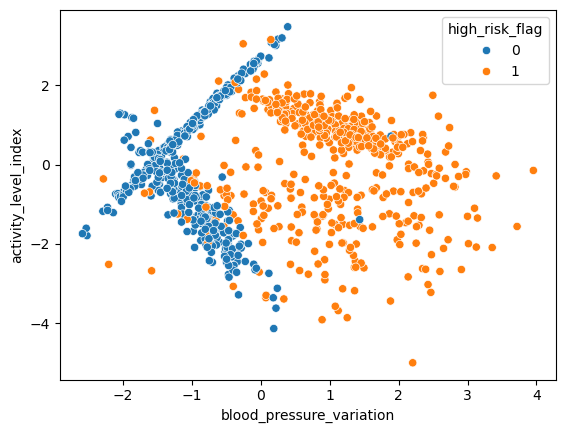

In [31]:
sns.scatterplot(x=df["blood_pressure_variation"],y=df["activity_level_index"],hue=df["high_risk_flag"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

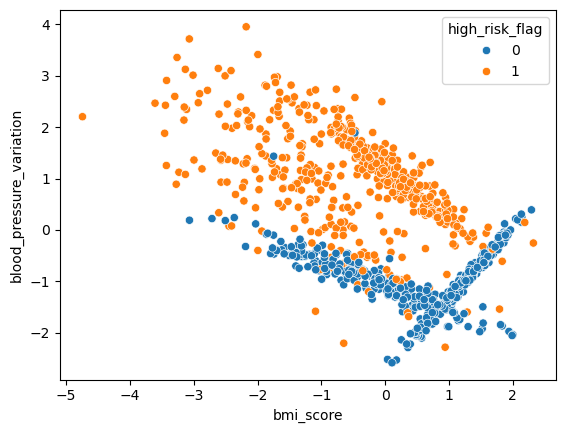

In [35]:
sns.scatterplot(x=df["bmi_score"],y=df["blood_pressure_variation"],hue=df["high_risk_flag"])
plt.show

In [39]:
df["high_risk_flag"].value_counts()  #balanced data

high_risk_flag
0    502
1    498
Name: count, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split

In [45]:
X = df.drop("high_risk_flag",axis=1)
y = df["high_risk_flag"]

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=15)

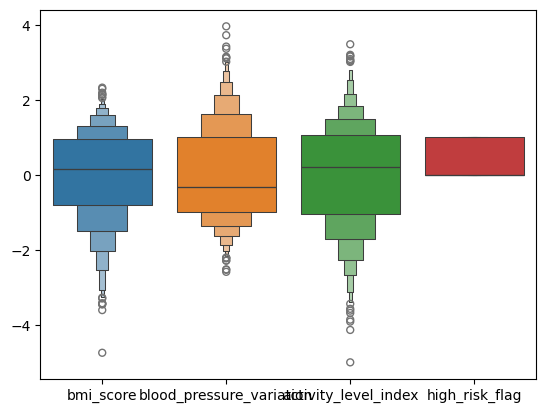

In [49]:
sns.boxenplot(data=df)
plt.show()

In [51]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [109]:
knn = KNeighborsClassifier(n_neighbors=3,algorithm="auto",weights="uniform")
knn.fit(X_train_scaled,y_train)
y_pred = knn.predict(X_test_scaled)

In [111]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [113]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[125   1]
 [  9 115]]
0.96
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       126
           1       0.99      0.93      0.96       124

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250



In [118]:
#-----------------------------------------> Regression

In [120]:
df_reg = pd.read_csv("12-house_energy_regression.csv")

In [124]:
df_reg.head(5)

,avg_indoor_temp_change,outdoor_humidity_level,daily_energy_consumption_kwh
0,-0.167118,0.146714,-14.996950
1,-0.020902,0.117327,-12.678089
2,0.150419,0.364961,17.775455
3,0.555604,0.089581,6.661465
4,0.058209,-1.142970,-14.195530


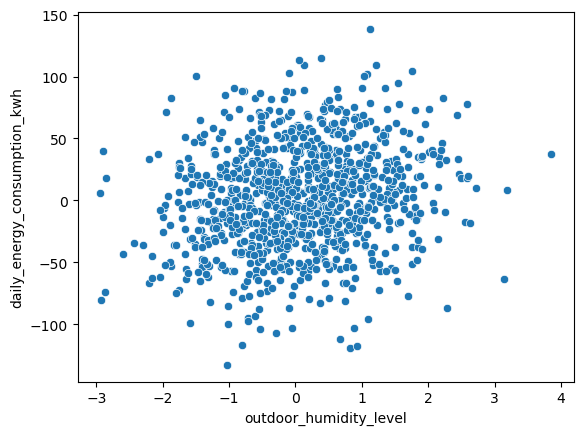

In [128]:
sns.scatterplot(x=df_reg["outdoor_humidity_level"],y=df_reg["daily_energy_consumption_kwh"])
plt.show()

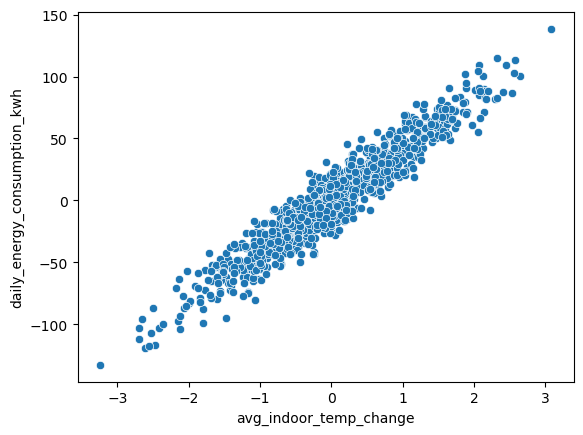

In [130]:
sns.scatterplot(x=df_reg["avg_indoor_temp_change"],y=df_reg["daily_energy_consumption_kwh"])
plt.show()

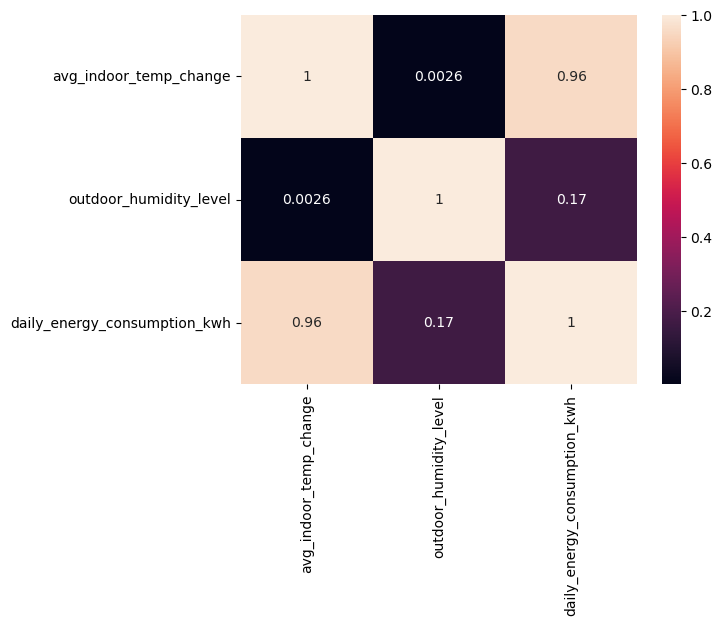

In [132]:
sns.heatmap(df_reg.corr(),annot=True)
plt.show()

In [134]:
X = df_reg.drop("daily_energy_consumption_kwh",axis=1)
y = df_reg["daily_energy_consumption_kwh"]

In [138]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=15)

In [140]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [142]:
from sklearn.neighbors import KNeighborsRegressor

In [148]:
kng = KNeighborsRegressor()
kng.fit(X_train_scaled,y_train)
y_pred = kng.predict(X_test_scaled)

In [150]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [152]:
print("r2 score: ", r2_score(y_test,y_pred))
print("mean absolute error: ", mean_absolute_error(y_test,y_pred))
print("mean squared error: ", mean_squared_error(y_test,y_pred))

r2 score:  0.9152685146562609
mean absolute error:  9.42143518926242
mean squared error:  140.40201685069158


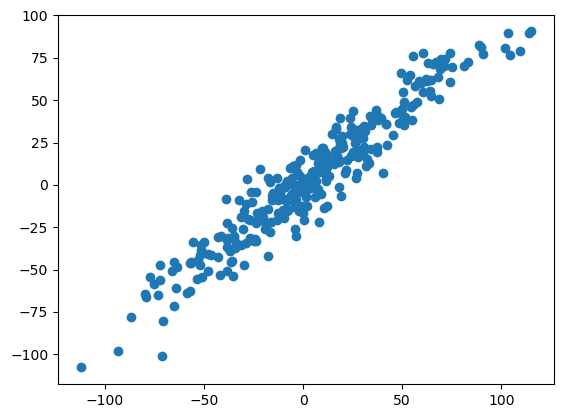

In [154]:
plt.scatter(y_test,y_pred)
plt.show()

In [156]:
regressor=KNeighborsRegressor(n_neighbors=7,algorithm='auto')
regressor.fit(X_train_scaled,y_train)

KNeighborsRegressor(n_neighbors=7)

r2 score:  0.9164863388635838
mean absolute error:  9.331428506491209
mean squared error:  138.3840541750219


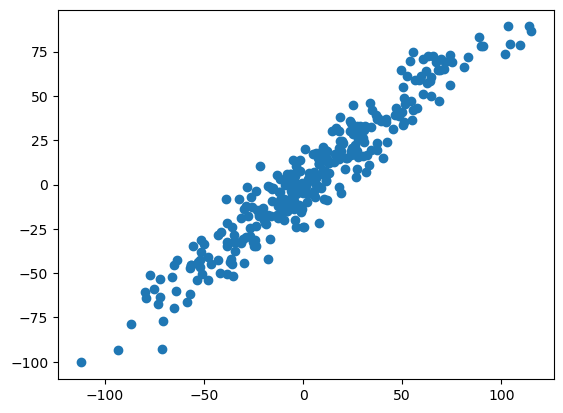

In [160]:
y_pred=regressor.predict(X_test_scaled)
print("r2 score: ", r2_score(y_test,y_pred))
print("mean absolute error: ", mean_absolute_error(y_test,y_pred))
print("mean squared error: ", mean_squared_error(y_test,y_pred))
plt.scatter(y_test,y_pred)
plt.show()

In [162]:
regressor=KNeighborsRegressor(n_neighbors=25,algorithm='auto') # if you exaggerate k values, your metrics will decrease
regressor.fit(X_train_scaled,y_train)

KNeighborsRegressor(n_neighbors=25)

r2 score:  0.9118719343331324
mean absolute error:  9.42127621485675
mean squared error:  146.0302284396658


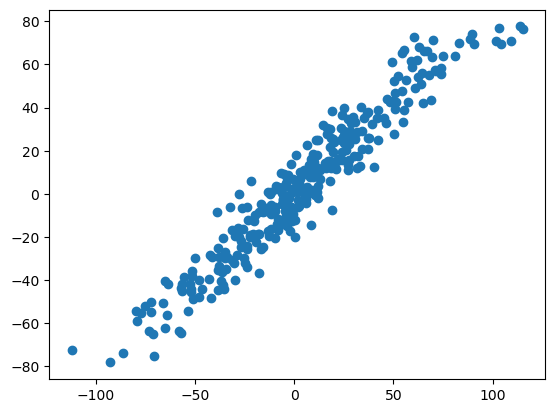

In [164]:

y_pred=regressor.predict(X_test_scaled)
print("r2 score: ", r2_score(y_test,y_pred))
print("mean absolute error: ", mean_absolute_error(y_test,y_pred))
print("mean squared error: ", mean_squared_error(y_test,y_pred))
plt.scatter(y_test,y_pred)
plt.show()
